## Multiple Linear

### Visualizing three numeric variables
There are also some "flat" alternatives to 3D plots that provide easier interpretation, though they require a little thinking about to make. A good approach is plotting the two numeric explanatory variables on the x- and y-axis of a scatter plot, and coloring the points according to the response variable.

In [1]:
import pandas as pd

taiwan_real_estate = pd.read_csv('../Datasets/taiwan_real_estate2.csv')
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


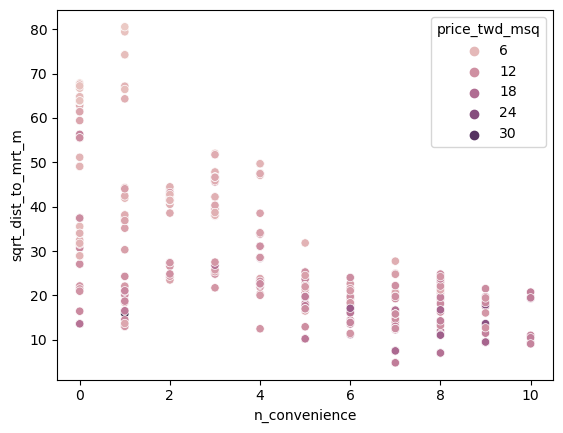

In [4]:
# import numpy, seaborn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Transform dist_to_mrt_m to sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate.dist_to_mrt_m)

# Draw a scatter plot of sqrt_dist_to_mrt_m vs. n_convenience colored by price_twd_msq
sns.scatterplot(
        x='n_convenience',
        y='sqrt_dist_to_mrt_m',
        hue='price_twd_msq',
        data=taiwan_real_estate
)

# Show the plot
plt.show()

In [5]:
taiwan_real_estate['price_twd_msq'].value_counts()

12.859304    4
12.193646    4
8.865356     4
12.284418    4
11.316188    4
            ..
16.913767    1
6.928896     1
6.505295     1
16.671710    1
19.334342    1
Name: price_twd_msq, Length: 270, dtype: int64

* Using `color - hue` for the **numeric response variable** is a `great alternative` for **3D scatter plots**. 
* The plot suggests that prices are higher when more convenience stores are nearby or when the distance to the nearest MRT station is short. 
* Additionally, there tend to be more convenience stores when the nearest MRT station is close.
* note how the hue and legend in scatterplot has a range that the colors change by the rows relative value and shades accordingly

In [6]:
## Modelikng two numeric explanatory variables
from statsmodels.formula.api import ols

# Fit linear regression of price vs. no. of conv. stores and sqrt dist. to nearest MRT, no interaction
mdl_price_vs_conv_dist = ols('price_twd_msq ~ sqrt_dist_to_mrt_m + n_convenience', data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_conv_dist.params)

Intercept             15.103790
sqrt_dist_to_mrt_m    -0.157300
n_convenience          0.214221
dtype: float64


In [14]:
from itertools import product

# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)

# Create p as all combinations of values of n_convenience and sqrt_dist_to_mrt_m
p = product(n_convenience, sqrt_dist_to_mrt_m)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=['n_convenience', 'sqrt_dist_to_mrt_m'])

# Quick summary of one products values (sqrt distance) for all convenience
display(explanatory_data.loc[explanatory_data['sqrt_dist_to_mrt_m'] == 10, :])

# Add column of predictions
prediction_data = explanatory_data.assign(
        price_twd_msq = mdl_price_vs_conv_dist.predict(explanatory_data)
)

# See the result  
display(prediction_data)


,n_convenience,sqrt_dist_to_mrt_m
1,0,10
10,1,10
19,2,10
28,3,10
37,4,10
46,5,10
55,6,10
64,7,10
73,8,10
82,9,10


,n_convenience,sqrt_dist_to_mrt_m,price_twd_msq
0,0,0,15.103790
1,0,10,13.530787
2,0,20,11.957784
3,0,30,10.384781
4,0,40,8.811778
...,...,...,...
94,10,40,10.953984
95,10,50,9.380981
96,10,60,7.807978
97,10,70,6.234975


* The modeling and prediction flow for two numeric variables is just as it was for the previous case that included a categorical variable. statsmodels automatically handles this different scenario

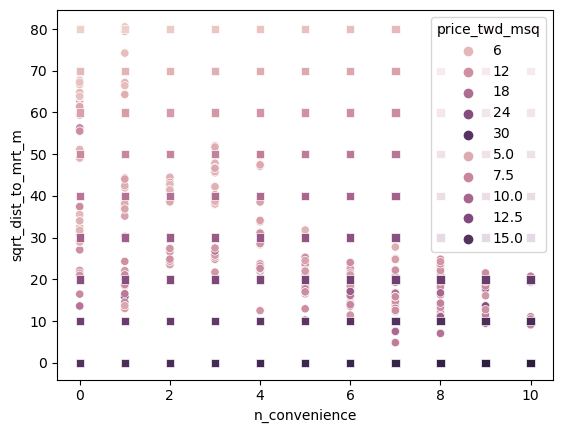

In [21]:
# Create scatter plot of taiwan_real_estate
g_1 = sns.scatterplot(x='n_convenience', 
                y='sqrt_dist_to_mrt_m', 
                hue='price_twd_msq',
                data=taiwan_real_estate)

# Create scatter plot of prediction_data without legend with square markers
g_2 = sns.scatterplot(x='n_convenience',
                y='sqrt_dist_to_mrt_m',
                hue='price_twd_msq',
                data=prediction_data,
                marker='s')

# Create a legend for first scatterplot
# first_legend = plt.legend(handles=[g_1], loc='upper right')
# # Add legend manually to the current Axes
# plt.gca().add_artist(first_legend)
# # Now Second
# plt.legend(handles=[g_2], loc='lower right')

# Show the plot
plt.show()

In [19]:
# Quick look at the prediction data for one row of n_convenience
prediction_data.loc[prediction_data['n_convenience'] == 3, :]

,n_convenience,sqrt_dist_to_mrt_m,price_twd_msq
27,3,0,15.746452
28,3,10,14.173449
29,3,20,12.600446
30,3,30,11.027443
31,3,40,9.454440
32,3,50,7.881437
33,3,60,6.308434
34,3,70,4.735431
35,3,80,3.162428


* Plotting a `colored grid of predictions` can give you a general idea of how your model performs. 
* The prediction grid confirms that your model is a good fit: 
    * prices are higher when more convenience stores are nearby or when the distance to the nearest MRT station is short.
    
<br>

### Including an Interaction
* it's possible (similar to numeric and categorical explanatory) for multiple numeric explanatory variables to interact. You'll get a third slope coefficient: one for each exp variable and one for the interaction

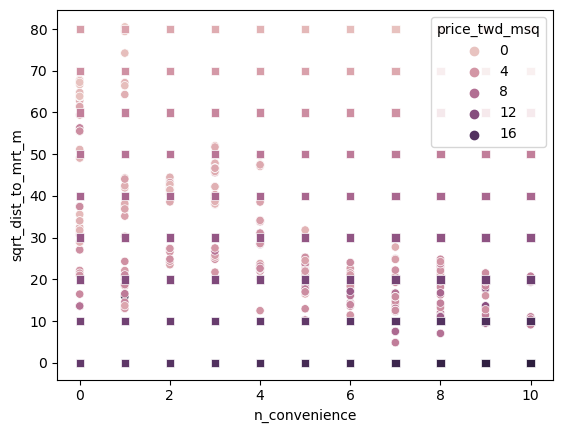

In [22]:
# Convert to mdl_price_vs_conv_dist_inter
mdl_price_vs_conv_dist_inter = ols("price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m + n_convenience:sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Use mdl_price_vs_conv_dist_inter to make predictions
n_convenience = np.arange(0, 11)
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)
p = product(n_convenience, sqrt_dist_to_mrt_m)
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "sqrt_dist_to_mrt_m"])
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv_dist_inter.predict(explanatory_data))

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=taiwan_real_estate, hue="price_twd_msq", legend=False)

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=prediction_data, hue="price_twd_msq", marker="s")

plt.show()

* The resulting prediction grid is not much different from the model without an interaction.

### More than two explanatory Varaibles
#### Faceting By Species
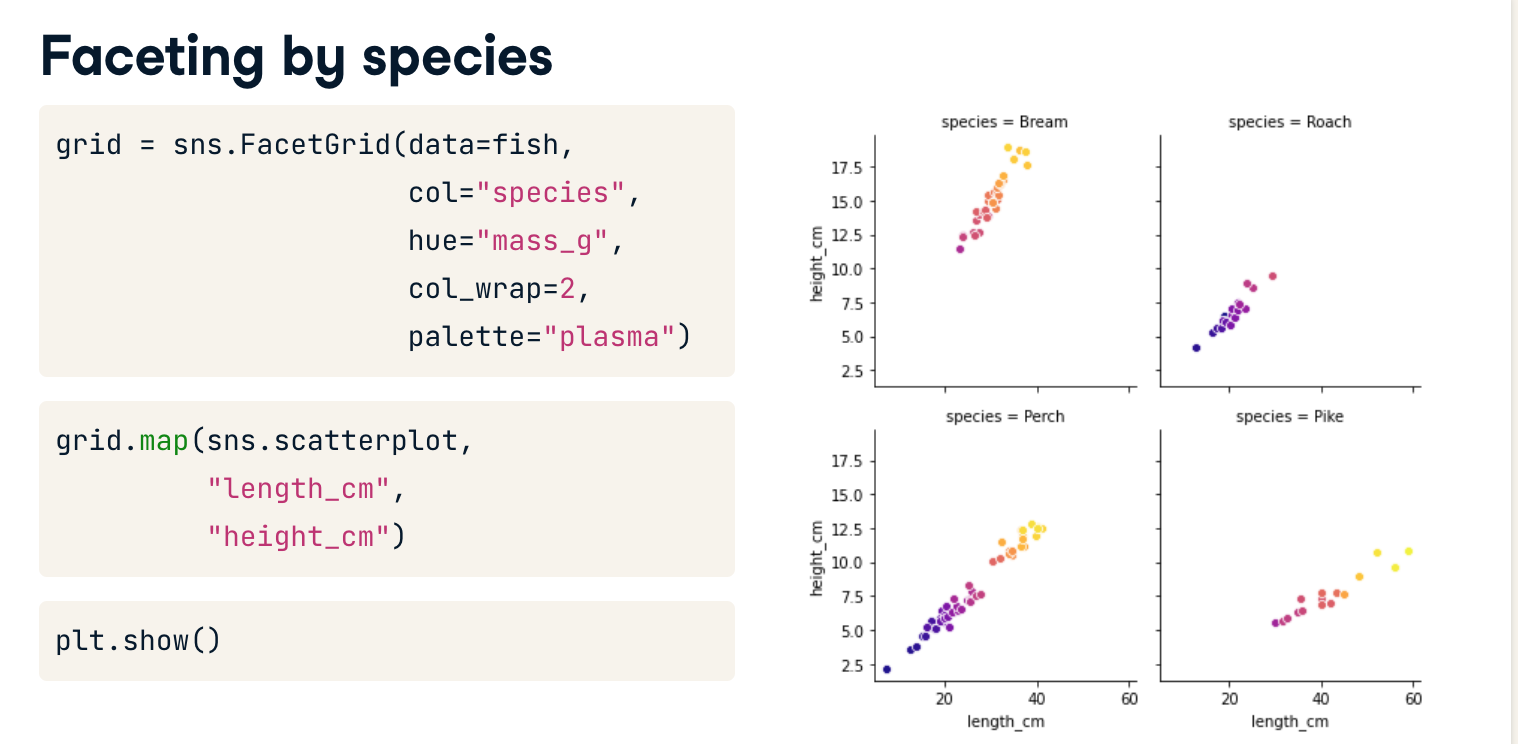

* The created `FacetGrid` holds the two variables we are categorizing
    * **species** - different columns in resulting grid
    * **mass_g** - colors for mass
* In a first step, you prepare the grid by specifying the layout: 
    * the col argument allows you to split by species, 
    * and the col_wrap argument makes it a two by two grid. 
    * The palette argument can be added optionally to improve the coloring. 
* The second step is to map what visualization you want to plot on the grid. 
    * In this case, you specify a scatter plot, with length and height on the x- and y-axis, respectively. 
* There is a noticeable strong positive correlation between length and height for each species of fish. 
    * The relationship between the explanatory variables and the response is harder to quantify because you can't determine colors as accurately as x and y coordinates. 
* In this example, brighter colors mean heavier fish, so for each species you can see that as fish get longer and taller they also get heavier.

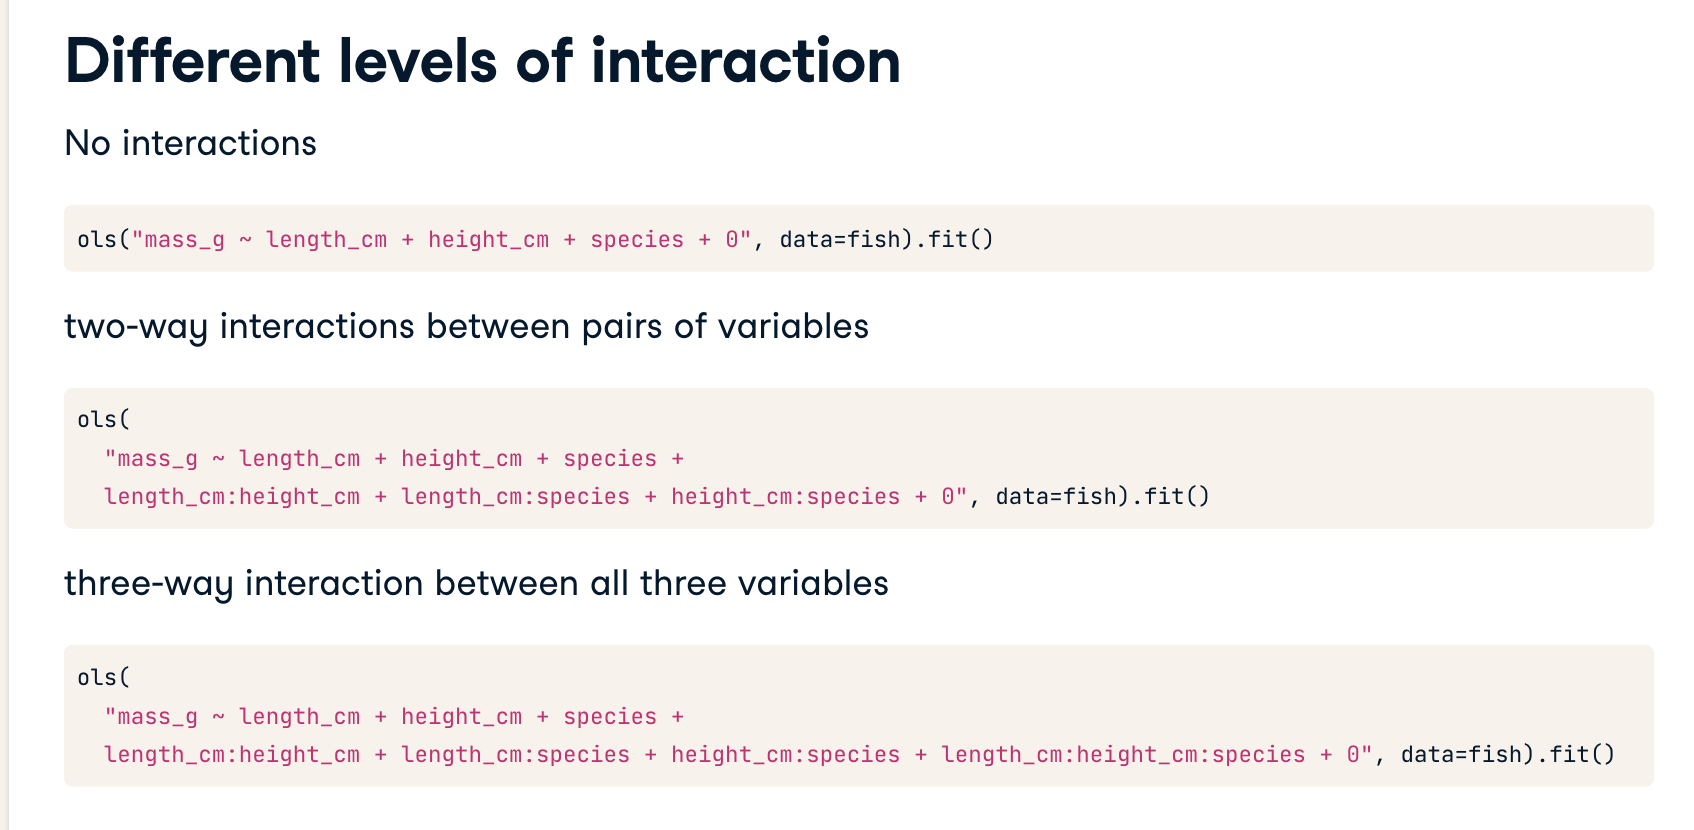

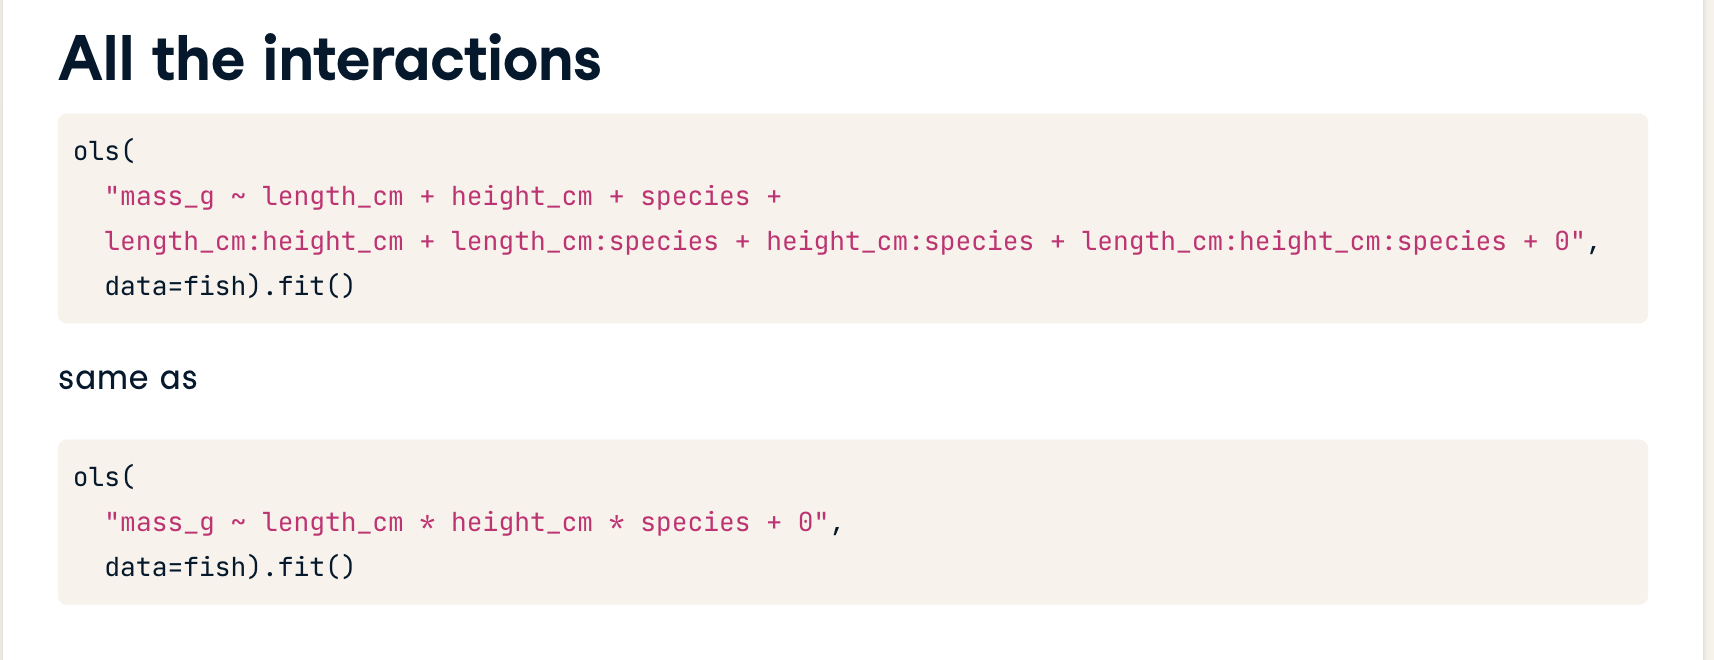
* You've already seen the concise syntax for including all the interactions. Simply swap the plus operators for times symbols. 
* Both these formulas mean the same thing. You still need a **plus before the zero** to denote not including a **global intercept term**.

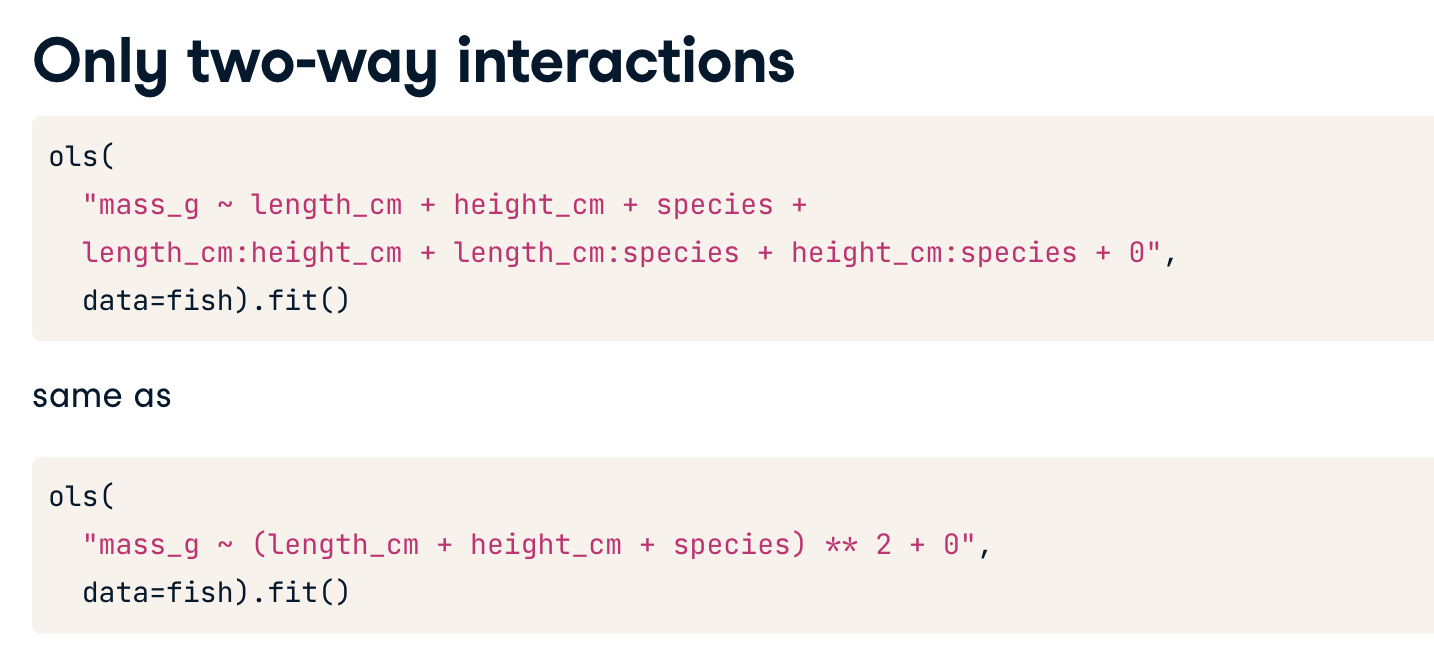
* To get only 2-way interactions in the model, but not the 3-way interaction, you can use a new syntax, namely wrapping the explanatory variables in parentheses and raising them to the power of two with two asterisks.

<br>

### Visualizing many variables
As you begin to consider more variables, plotting them all at the same time becomes increasingly difficult. 
* In addition to using x and y scales for two numeric variables, you can use color for a third numeric variable, and you can use faceting for categorical variables. And that's about your limit before the plots become too difficult to interpret. 
* There are some specialist plot types like correlation heatmaps and parallel coordinates plots that will handle more variables, but they give you much less information about each variable, and they aren't great for visualizing model predictions.
* Here you'll push the limits of the scatter plot by showing the house price, the distance to the MRT station, the number of nearby convenience stores, and the house age, all together in one plot.

In [23]:
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,sqrt_dist_to_mrt_m
0,84.87882,10,30 to 45,11.467474,9.212970
1,306.59470,9,15 to 30,12.768533,17.509846
2,561.98450,5,0 to 15,14.311649,23.706212
3,561.98450,5,0 to 15,16.580938,23.706212
4,390.56840,5,0 to 15,13.040847,19.762803


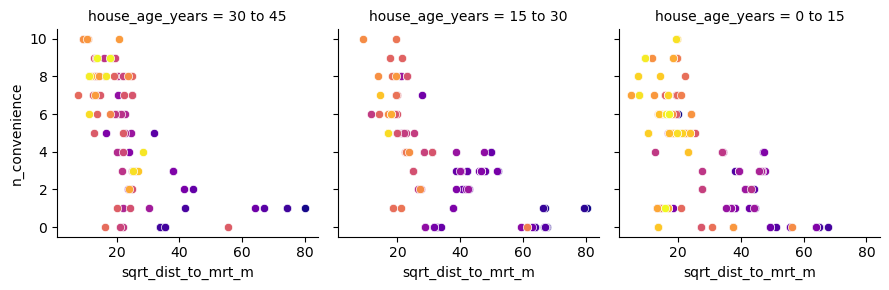

In [24]:
# Prepare the grid using taiwan_real_estate, for each house age category, colored by price_twd_msq
grid = sns.FacetGrid(
        data=taiwan_real_estate,
        col='house_age_years',
        hue='price_twd_msq',
        palette='plasma'
)

# Plot the scatterplots with sqrt_dist_to_mrt_m on the x-axis and n_convenience on the y-axis
grid.map(sns.scatterplot,
        'sqrt_dist_to_mrt_m',
        'n_convenience')

# Show the plot (brighter colors mean higher prices)
plt.show()

* The plot shows the same as before:
    * `house price` increases with `shorter distances` to the `nearest MRT station`, and increases with the number of `nearby convenience` stores. 
* Faceting by house age suggests that this effect is similar for all house age groups. 
* As you add more variables, it becomes increasingly challenging to create an easily interpretable plot.

<br>

### Different levels of interaction
Once you have three explanatory variables, the number of options for specifying interactions increases. You can specify no interactions. You can specify 2-way interactions, which gives you model coefficients for each pair of variables. The third option is to specify all the interactions, which means the three 2-way interactions and the interaction between all three explanatory variables.

In [25]:
# Model price vs. no. of conv. stores, sqrt dist. to MRT station & house age, no global intercept, no interactions
mdl_price_vs_all_no_inter = ols('price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m + house_age_years', 
                                data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_no_inter.params)

Intercept                      15.474464
house_age_years[T.15 to 30]    -1.344405
house_age_years[T.30 to 45]    -1.708970
n_convenience                   0.257666
sqrt_dist_to_mrt_m             -0.148102
dtype: float64


In [26]:
# Model price vs. sqrt dist. to MRT station, no. of conv. stores & house age, no global intercept, 3-way interactions
mdl_price_vs_all_3_way_inter = ols('price_twd_msq ~ n_convenience * sqrt_dist_to_mrt_m * house_age_years', 
                                  data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_3_way_inter.params)

Intercept                                                       16.046849
house_age_years[T.15 to 30]                                     -2.286784
house_age_years[T.30 to 45]                                     -3.958077
n_convenience                                                    0.374982
n_convenience:house_age_years[T.15 to 30]                        0.078370
n_convenience:house_age_years[T.30 to 45]                        0.066720
sqrt_dist_to_mrt_m                                              -0.162944
sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]                   0.036618
sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]                   0.061281
n_convenience:sqrt_dist_to_mrt_m                                -0.008393
n_convenience:sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]    -0.003821
n_convenience:sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]     0.004401
dtype: float64


In [27]:
# Model price vs. sqrt dist. to MRT station, no. of conv. stores & house age, no global intercept, 2-way interactions
mdl_price_vs_all_2_way_inter = ols('price_twd_msq ~ (n_convenience + sqrt_dist_to_mrt_m + house_age_years) ** 2',
                                  data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_2_way_inter.params)

Intercept                                         16.026633
house_age_years[T.15 to 30]                       -2.145842
house_age_years[T.30 to 45]                       -4.099729
n_convenience                                      0.384914
n_convenience:house_age_years[T.15 to 30]         -0.006894
n_convenience:house_age_years[T.30 to 45]          0.143416
sqrt_dist_to_mrt_m                                -0.162025
sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]     0.031600
sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]     0.068198
n_convenience:sqrt_dist_to_mrt_m                  -0.008956
dtype: float64


### Predicting again
You've followed the prediction workflow several times now with different combinations of explanatory variables. Time to try it once more on the model with three explanatory variables. Here, you'll use the model with 3-way interactions, though the code is the same when using any of the three models from the previous exercise.

In [28]:
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)

# Create house_age_years with unique values
house_age_years = taiwan_real_estate['house_age_years'].unique()

# Create p as all combinations of n_convenience, sqrt_dist_to_mrt_m, and house_age_years, in that order
p = product(n_convenience, sqrt_dist_to_mrt_m, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=['n_convenience', 'sqrt_dist_to_mrt_m', 'house_age_years'])

# See the result
display(explanatory_data.head(15))

,n_convenience,sqrt_dist_to_mrt_m,house_age_years
0,0,0,30 to 45
1,0,0,15 to 30
2,0,0,0 to 15
3,0,10,30 to 45
4,0,10,15 to 30
5,0,10,0 to 15
6,0,20,30 to 45
7,0,20,15 to 30
8,0,20,0 to 15
9,0,30,30 to 45


In [29]:
# Add column of predictions
prediction_data = explanatory_data.assign(
       price_twd_msq = mdl_price_vs_all_3_way_inter.predict(explanatory_data)
)

# See the result
display(prediction_data.head(15))

,n_convenience,sqrt_dist_to_mrt_m,house_age_years,price_twd_msq
0,0,0,30 to 45,12.088773
1,0,0,15 to 30,13.760066
2,0,0,0 to 15,16.046849
3,0,10,30 to 45,11.072148
4,0,10,15 to 30,12.496811
5,0,10,0 to 15,14.417411
6,0,20,30 to 45,10.055524
7,0,20,15 to 30,11.233557
8,0,20,0 to 15,12.787972
9,0,30,30 to 45,9.038900


### Quick Linear Regression Detail
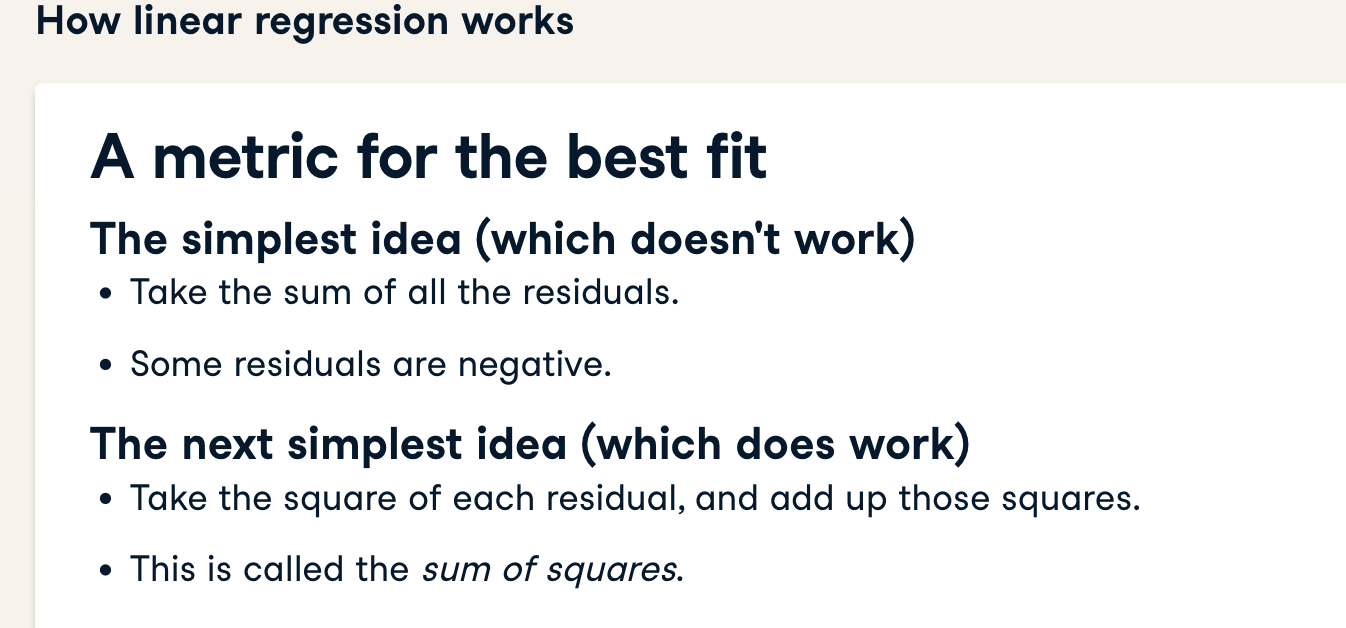
* The sum of squares
    * In order to choose the "best" line to fit the data, regression models need to optimize some metric. 
    * For linear regression, this metric is called the `sum of squares`.
    
* `Linear regression` minimizes the sum of the squares of the differences between the actual responses and the predicted responses.
    * How OLS - linear regression tries to optimize the sum of squares metric
    
<br>

To truly understand linear regression, it is helpful to know how the algorithm works. The code for ols() is hundreds of lines because it has to work with any formula and any dataset. However, in the case of simple linear regression for a single dataset, you can implement a linear regression algorithm in just a few lines of code.

In [31]:
# The explanatory values (the n_convenience column of taiwan_real_estate) are available as x_actual
x_actual = taiwan_real_estate['n_convenience']

# The response values (the price_twd_msq column of taiwan_real_estate) are available as y_actual.
y_actual = taiwan_real_estate['price_twd_msq']

In [33]:
# Complete the function
def calc_sum_of_squares(coeffs):
    # Unpack coeffs
    intercept, slope = coeffs
    # Calculate predicted y-values
    y_pred = intercept + slope * x_actual
    # Calculate differences between y_pred and y_actual
    y_diff = y_pred - y_actual
    # Calculate sum of squares
    sum_sq = np.sum(y_diff ** 2)
    # Return sum of squares
    return sum_sq
  
# Test the function with intercept 10 and slope 1
print(calc_sum_of_squares([10, 1]))

7667.734402786995


In [36]:
from scipy.optimize import minimize

# Call minimize on calc_sum_of_squares  
print(minimize(fun=calc_sum_of_squares,
               x0=[0,0]))

print('\n\n')

# Compare the output with the ols() call.
print(ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate).fit().params)

      fun: 4717.68623992569
 hess_inv: array([[ 0.00354669, -0.00057129],
       [-0.00057129,  0.00013954]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([8.22423743, 0.79807971])



Intercept        8.224237
n_convenience    0.798080
dtype: float64


* The results you got here with just a few lines of code are identical to the finely-tuned results from ols(). All you needed was a function to calculate the sum of squares metric, and the minimize() function worked its magic to find where this function had its minimum value.

<br>

## Multiple Log Regression
### Logistic regression with two explanatory variables

Logistic regression also supports multiple explanatory variables. To include multiple explanatory variables in logistic regression models, the syntax is the same as for linear regressions.

In [37]:
churn = pd.read_csv('../Datasets/churn.csv')
churn.head()

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


In [38]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn status vs. length of relationship, recency, and an interaction
mdl_churn_vs_both_inter = logit('has_churned ~ time_since_first_purchase * time_since_last_purchase', 
                               data=churn).fit()

# Print the coefficients
print(mdl_churn_vs_both_inter.params)

Optimization terminated successfully.
         Current function value: 0.649717
         Iterations 5
Intercept                                            -0.150534
time_since_first_purchase                            -0.637642
time_since_last_purchase                              0.423284
time_since_first_purchase:time_since_last_purchase    0.112250
dtype: float64


In [40]:
# Create time_since_first_purchase
time_since_first_purchase = np.arange(-2, 4.1, 0.1)

# Create time_since_last_purchase
time_since_last_purchase = np.arange(-1, 6.1, 0.1)

# Create p as all combinations of values of time_since_first_purchase and time_since_last_purchase
p = product(time_since_first_purchase, time_since_last_purchase)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=['time_since_first_purchase', 'time_since_last_purchase'])

# Print the result
display(explanatory_data.head(15))

,time_since_first_purchase,time_since_last_purchase
0,-2.0,-1.000000e+00
1,-2.0,-9.000000e-01
2,-2.0,-8.000000e-01
3,-2.0,-7.000000e-01
4,-2.0,-6.000000e-01
5,-2.0,-5.000000e-01
6,-2.0,-4.000000e-01
7,-2.0,-3.000000e-01
8,-2.0,-2.000000e-01
9,-2.0,-1.000000e-01


In [42]:
# Create prediction_data
prediction_data = explanatory_data.assign(
        has_churned = mdl_churn_vs_both_inter.predict(explanatory_data)
)

# Create most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data['has_churned'])

# See the result
display(prediction_data.head())

,time_since_first_purchase,time_since_last_purchase,has_churned,most_likely_outcome
0,-2.0,-1.0,0.716256,1.0
1,-2.0,-0.9,0.720279,1.0
2,-2.0,-0.8,0.724266,1.0
3,-2.0,-0.7,0.728218,1.0
4,-2.0,-0.6,0.732134,1.0


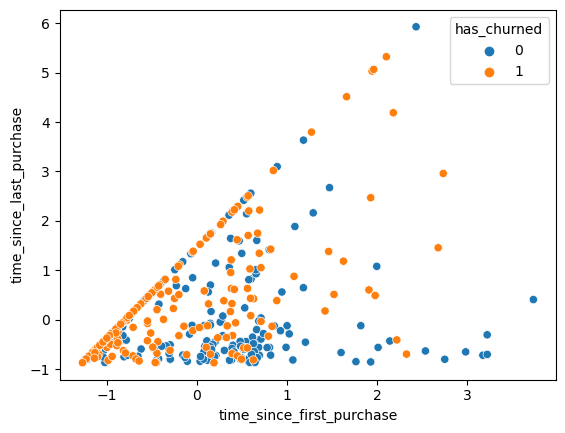

In [46]:
# Using the churn dataset, plot the recency of purchase, time_since_last_purchase, 
# versus the length of customer relationship, time_since_first_purchase, 
# colored by whether or not the customer churned, has_churned.

# Using churn, plot recency vs. length of relationship, colored by churn status
sns.scatterplot(x="time_since_first_purchase",
                y="time_since_last_purchase",
                data=churn, 
                hue="has_churned")

# Show the plot
plt.show()

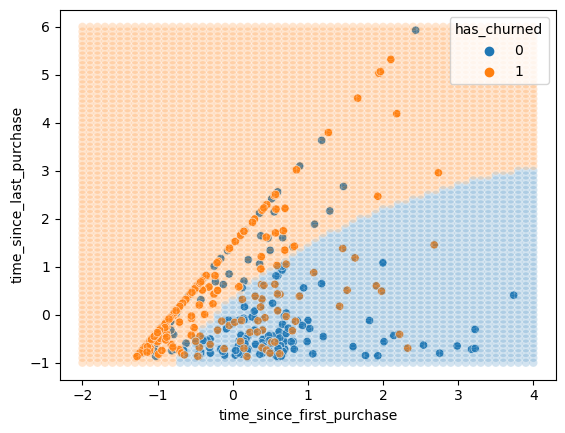

In [48]:
# Using churn, plot recency vs. length of relationship, colored by churn status
sns.scatterplot(x="time_since_first_purchase",
                y="time_since_last_purchase",
                data=churn, 
                hue="has_churned")

# Using prediction_data, plot recency vs. length of relationship, colored by most_likely_outcome
sns.scatterplot(x="time_since_first_purchase",
                y="time_since_last_purchase",
                data=prediction_data, 
                hue="most_likely_outcome",
                alpha=0.2,
                legend=False)

# Show the plot
plt.show()

* The reason why the data points lie on or to the right of the diagonal line is due to nature of the data: the time since the last purchase can't exceed the time since the first purchase. Also notice the pattern of the prediction data: longer customer relationships and shorter purchase recency predicts lower churns.

### Confusion Matrix
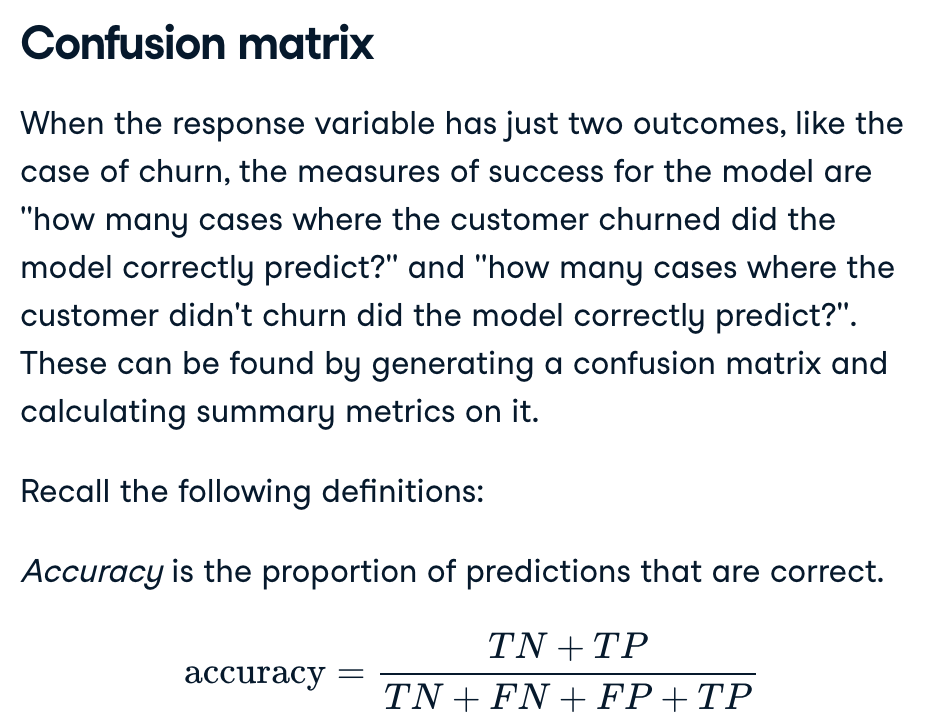

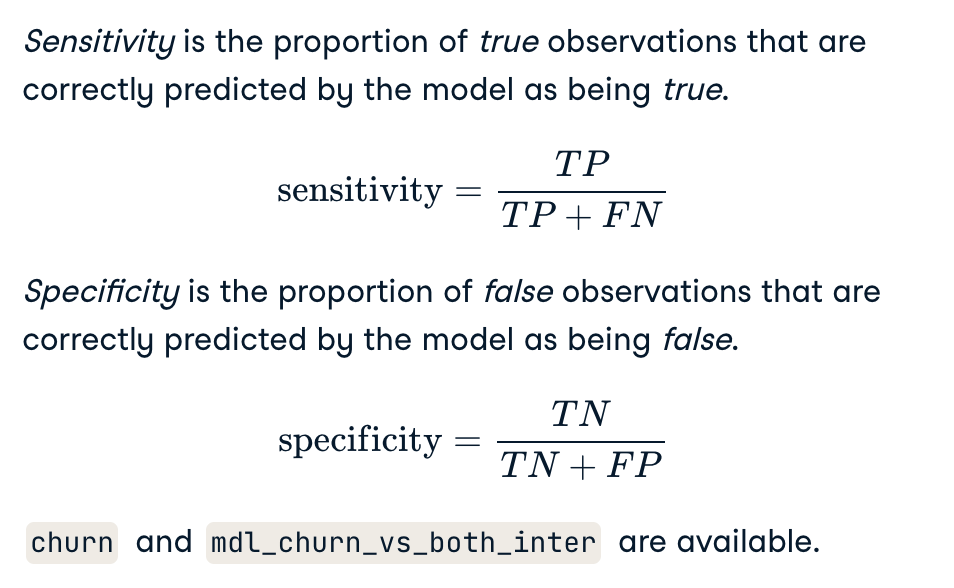

* One common way to evaluate the quality of a logistic regression model is to create a confusion matrix, which is a 2×2 table that shows the predicted values from the model vs. the actual values from the test dataset.

In [50]:
# Create conf_matrix
conf_matrix = mdl_churn_vs_both_inter.pred_table()

# Print it
print(conf_matrix)

[[102.  98.]
 [ 53. 147.]]


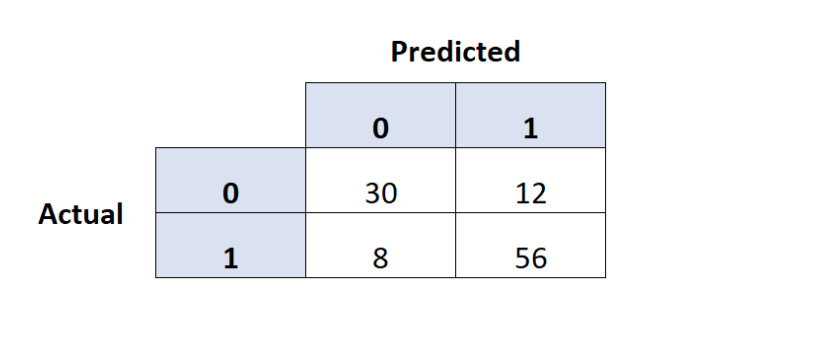

In [53]:
# Extract the number of true positives (TP), true negatives (TN), 
# false positives (FP), and false negatives (FN) from conf_matrix
type(conf_matrix), conf_matrix[0][1]

TN = conf_matrix[0][0]
TP = conf_matrix[1][1]
FN = conf_matrix[1][0]
FP = conf_matrix[0][1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + FN + FP + TP)
print("accuracy", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (TP + FN)
print("sensitivity", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity", specificity)

accuracy 0.6225
sensitivity 0.735
specificity 0.51


* Generating a confusion matrix and calculating metrics like accuracy, sensitivity, and specificity is the standard way to measure how well a logistic model fits. Higher accuracy, sensitivity, and specificity is better, though there is often a trade-off between sensitivity and specificity. 

In [54]:
## Cumulative distribution function

from scipy.stats import logistic

x = np.arange(-10, 10.1, .1)

logistic_dist = pd.DataFrame({
    'x':x,
    'log_cdf':logistic.cdf(x),
    'log_cdf_man':1/(1 + np.exp(-x))
})

# Check that each logistic function gives the same results
print(np.array_equal(logistic_dist["log_cdf_man"], logistic_dist["log_cdf_man"]))

True


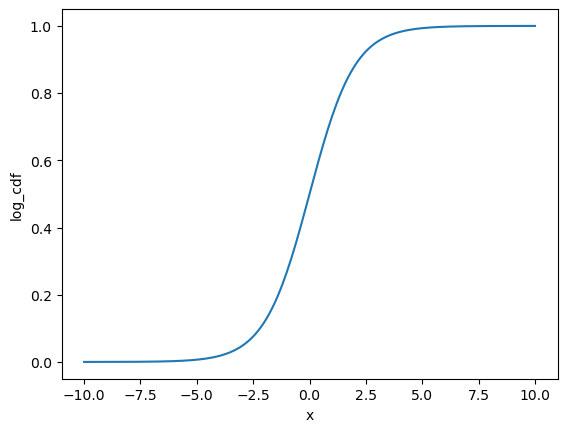

In [55]:
# Using logistic_dist, plot log_cdf vs. x
sns.lineplot(data=logistic_dist, x='x', y='log_cdf')

# Show the plot
plt.show()

### Inverse cumulative distribution function
The logistic function (logistic distribution CDF) has another important property: each x input value is transformed to a unique value. That means that the transformation can be reversed. The logit function is the name for the inverse logistic function, which is also the logistic distribution inverse cumulative distribution function. (All three terms mean exactly the same thing.)

In [56]:
# Create p ranging from 0.001 to 0.999 in steps of 0.001
p = np.arange(0.001, 1, 0.001)

# Create logistic_dist_inv
logistic_dist_inv = pd.DataFrame({"p": p,
                                  "logit": logistic.ppf(p),
                                  "logit_man": np.log(p / (1 - p))})

# Check that each logistic function gives the same results
print(np.array_equal(logistic_dist_inv["logit"], logistic_dist_inv["logit_man"]))

True


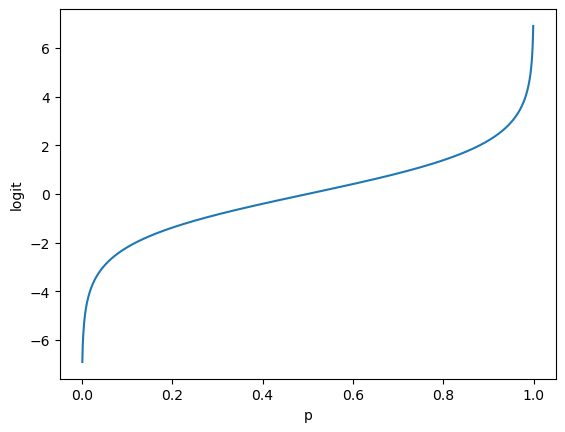

In [57]:
# Using logistic_dist_inv, plot logit vs. p
sns.lineplot(data=logistic_dist_inv,x='p', y='logit')

# Show the plot
plt.show()

* Logistic regression chooses the prediction line that gives you the maximum likelihood value. It also gives maximum log-likelihood.

In [58]:
x_actual = churn['time_since_last_purchase']
y_actual = churn['has_churned']

# Complete the function
def calc_neg_log_likelihood(coeffs):
    # Unpack coeffs
    intercept, slope = coeffs
    # Calculate predicted y-values
    y_pred = logistic.cdf(intercept + slope * x_actual)
    # Calculate log-likelihood
    log_likelihood = np.log(y_pred) * y_actual + np.log(1 - y_pred) * (1 - y_actual)
    # Calculate negative sum of log_likelihood
    neg_sum_ll = -np.sum(log_likelihood)
    # Return negative sum of log_likelihood
    return neg_sum_ll

# Test the function with intercept 10 and slope 1
print(calc_neg_log_likelihood([10, 1]))

1997.9624945172732


In [59]:
# Call minimize on calc_sum_of_squares  
print(minimize(fun=calc_neg_log_likelihood,
               x0=[0,0]))

# Compare the output with the logit() call.
print(logit("has_churned ~ time_since_last_purchase", data=churn).fit().params)

      fun: 273.2001452736106
 hess_inv: array([[ 0.0101836 , -0.00098878],
       [-0.00098878,  0.00962925]])
      jac: array([-7.62939453e-06, -3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([-0.0350195 ,  0.26921495])
Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4
Intercept                  -0.035019
time_since_last_purchase    0.269215
dtype: float64
